In [13]:
import pandas as pd
import yfinance
from pandas_datareader import data
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import wget

In [14]:
# Only get the adjusted close.
# aapl = data.DataReader("AAPL", 
#                        start='2015-1-1', 
#                        end='2015-12-31', 
#                        data_source='yahoo')

aapl = data.DataReader("BTC", 
                       start='2015-1-1', 
                       end='2015-12-31', 
                       data_source='yahoo')

aapl.plot(title='AAPL Adj. Closing Price')
plt.show()

KeyError: 'Date'

In [5]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='R6L2F8R75QMK25HR',output_format = 'pandas')#2N7U5OBZO5MQT4IL
# Get json object with the intraday data and another with  the call's metadata
#data,_ = ts.get_daily_adjusted('AYI' , outputsize='full')
#data,_ = ts.get_daily('BTC' , outputsize='full')

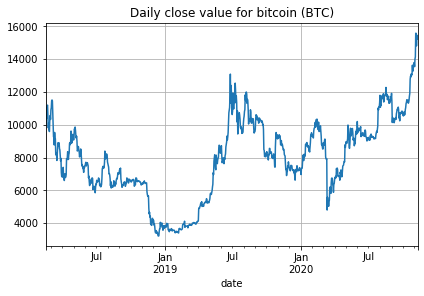

In [11]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
cc = CryptoCurrencies(key='R6L2F8R75QMK25HR', output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='USD')
#data, meta_data = cc.get_digital_currency_monthly(symbol='BTC', market='USD')
#data, meta_data = cc.get_digital_currency_weekly(symbol='BTC', market='USD')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

In [8]:
help(cc)

Help on CryptoCurrencies in module alpha_vantage.cryptocurrencies object:

class CryptoCurrencies(alpha_vantage.alphavantage.AlphaVantage)
 |  CryptoCurrencies(key=None, output_format='json', treat_info_as_error=True, indexing_type='date', proxy=None, rapidapi=False)
 |  
 |  This class implements all the crypto currencies api calls
 |  
 |  Method resolution order:
 |      CryptoCurrencies
 |      alpha_vantage.alphavantage.AlphaVantage
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  get_digital_currency_daily(self, symbol, market)
 |      Returns  the daily historical time series for a digital currency
 |      (e.g., BTC) traded on a specific market (e.g., CNY/Chinese Yuan),
 |      refreshed daily at midnight (UTC). Prices and volumes are quoted in
 |      both the market-specific currency and USD..
 |      
 |      Keyword Arguments:
 |          symbol: The digital/crypto currency of your choice. It can be any
 |          of the currencies in the digital currency li

In [3]:
help(ts)

Help on TimeSeries in module alpha_vantage.timeseries object:

class TimeSeries(alpha_vantage.alphavantage.AlphaVantage)
 |  TimeSeries(key=None, output_format='json', treat_info_as_error=True, indexing_type='date', proxy=None, rapidapi=False)
 |  
 |  This class implements all the api calls to times series
 |  
 |  Method resolution order:
 |      TimeSeries
 |      alpha_vantage.alphavantage.AlphaVantage
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  get_batch_stock_quotes(self, symbols)
 |      Return multiple stock quotes with a single request.
 |      It raises ValueError when problems arise
 |      
 |      Keyword Arguments:
 |          symbols:  A tuple or list Sof symbols to query
 |  
 |  get_daily(self, symbol, outputsize='compact')
 |      Return daily time series in two json objects as data and
 |      meta_data. It raises ValueError when problems arise
 |      
 |      Keyword Arguments:
 |          symbol:  the symbol for the equity we want to get its da

In [4]:
tosave = data[['5. adjusted close', '6. volume']]
print(tosave)

            5. adjusted close  6. volume
date                                    
2020-10-08           101.5400  2379833.0
2020-10-07           113.2600   623263.0
2020-10-06           109.6900   556865.0
2020-10-05           109.9900   525724.0
2020-10-02           105.6100   572600.0
...                       ...        ...
2001-12-07            10.5845   399500.0
2001-12-06            10.9771   291300.0
2001-12-05            11.0399   906200.0
2001-12-04            10.7965   780700.0
2001-12-03            10.8358   847400.0

[4746 rows x 2 columns]


In [5]:
tosave.to_csv('test.csv')

In [4]:

data = pd.read_csv('test.csv',index_col = 0)
x = data.to_numpy()
print(x)
price,volume = data.to_numpy().T
plt.plot(data.price)

[[1.053590e+01 8.656500e+06]
 [9.932100e+00 2.218340e+07]
 [9.621100e+00 1.953870e+07]
 ...
 [1.096500e+02 3.060733e+06]
 [1.110500e+02 4.201819e+06]
 [1.083700e+02 4.773555e+06]]


AttributeError: 'DataFrame' object has no attribute 'price'

In [5]:
data ,metadata = ts.get_daily_adjusted('GOOGL',outputsize = 'full')

In [6]:
print(data)

            1. open  2. high   3. low  4. close  5. adjusted close  \
date                                                                 
2020-04-01  1124.00  1129.42  1093.49  1102.100          1102.1000   
2020-03-31  1148.73  1173.40  1136.72  1161.950          1161.9500   
2020-03-30  1132.64  1151.00  1098.49  1146.310          1146.3100   
2020-03-27  1127.47  1151.05  1104.00  1110.260          1110.2600   
2020-03-26  1114.72  1171.48  1092.03  1162.920          1162.9200   
...             ...      ...      ...       ...                ...   
2004-08-25   104.76   108.00   103.88   106.000            53.1641   
2004-08-24   111.24   111.60   103.57   104.870            52.5974   
2004-08-23   110.76   113.48   109.05   109.400            54.8694   
2004-08-20   101.01   109.08   100.50   108.310            54.3227   
2004-08-19   100.01   104.06    95.96   100.335            50.3228   

             6. volume  7. dividend amount  8. split coefficient  
date                  

In [7]:
ticker_df = pd.read_csv("../stock_data/tickers.csv")
ticker_df.head()

,ticker,name,is_etf,exchange
0,AABA,Altaba Inc.,NaN,NASDAQ
1,AAL,"American Airlines Group, Inc.",NaN,NASDAQ
2,AAME,Atlantic American Corporation,NaN,NASDAQ
3,AAOI,"Applied Optoelectronics, Inc.",NaN,NASDAQ
4,AAON,"AAON, Inc.",NaN,NASDAQ


In [12]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

In [13]:
ticks = save_sp500_tickers()

In [14]:
ticks

['MMM\n',
 'ABT\n',
 'ABBV\n',
 'ABMD\n',
 'ACN\n',
 'ATVI\n',
 'ADBE\n',
 'AMD\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALXN\n',
 'ALGN\n',
 'ALLE\n',
 'AGN\n',
 'ADS\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'ANTM\n',
 'AON\n',
 'AOS\n',
 'APA\n',
 'AIV\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ADM\n',
 'ARNC\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'ATO\n',
 'T\n',
 'ADSK\n',
 'ADP\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BLL\n',
 'BAC\n',
 'BK\n',
 'BAX\n',
 'BDX\n',
 'BRK.B\n',
 'BBY\n',
 'BIIB\n',
 'BLK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BF.B\n',
 'CHRW\n',
 'COG\n',
 'CDNS\n',
 'CPB\n',
 'COF\n',
 'CPRI\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC\n',
 'CNP\